In [3]:
from astropy.io import fits 
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
data = fits.open("/home/andresgo/Documents/Solar Astrophysics/Lecture 11/6300_synth.fits")

In [5]:
data.info()

Filename: /home/andresgo/Documents/Solar Astrophysics/Lecture 11/6300_synth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (131, 4, 288, 288)   float64   
  1                1 ImageHDU         6   (131,)   float64   


In [6]:
stokes0 = data[0].data
ll = data[1].data
print(ll)

[6300.7  6300.72 6300.74 6300.76 6300.78 6300.8  6300.82 6300.84 6300.86
 6300.88 6300.9  6300.92 6300.94 6300.96 6300.98 6301.   6301.02 6301.04
 6301.06 6301.08 6301.1  6301.12 6301.14 6301.16 6301.18 6301.2  6301.22
 6301.24 6301.26 6301.28 6301.3  6301.32 6301.34 6301.36 6301.38 6301.4
 6301.42 6301.44 6301.46 6301.48 6301.5  6301.52 6301.54 6301.56 6301.58
 6301.6  6301.62 6301.64 6301.66 6301.68 6301.7  6301.72 6301.74 6301.76
 6301.78 6301.8  6301.82 6301.84 6301.86 6301.88 6301.9  6301.92 6301.94
 6301.96 6301.98 6302.   6302.02 6302.04 6302.06 6302.08 6302.1  6302.12
 6302.14 6302.16 6302.18 6302.2  6302.22 6302.24 6302.26 6302.28 6302.3
 6302.32 6302.34 6302.36 6302.38 6302.4  6302.42 6302.44 6302.46 6302.48
 6302.5  6302.52 6302.54 6302.56 6302.58 6302.6  6302.62 6302.64 6302.66
 6302.68 6302.7  6302.72 6302.74 6302.76 6302.78 6302.8  6302.82 6302.84
 6302.86 6302.88 6302.9  6302.92 6302.94 6302.96 6302.98 6303.   6303.02
 6303.04 6303.06 6303.08 6303.1  6303.12 6303.14 6303

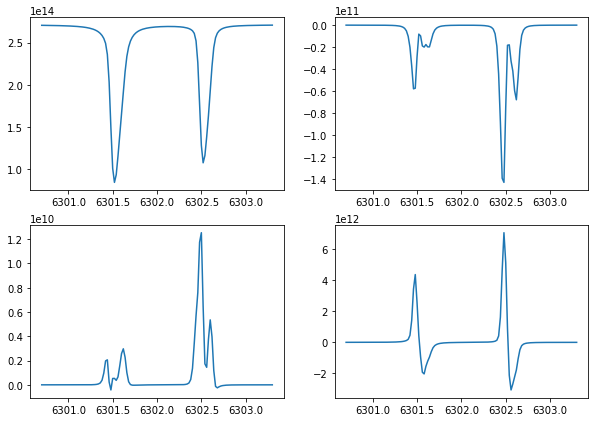

In [7]:
x_coordinate = 18
y_coordinate = 202
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,0])
plt.subplot(222)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,1])
plt.subplot(223)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,2])
plt.subplot(224)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,3])

In [8]:
# Telescope / observing specifications:
D = 4E2 # Diameter in cm 
t = 1 # Exposure in s 
dlambda = (ll[1]-ll[0])*1E-8 # Lambda bin in cm 
au = 150E11 # 1 AU in cm 
a = 20E5 # Pixel size "on the sun" in cm 
pi = np.pi # 3.14, we will use this often 
deltaE = 6.626E-27 * 2.997E10/6300.E-8 # Energy of the photon 
conversion = a**2.0 * (D/2.)**2.0 * pi / au ** 2.0 * dlambda * 1 / deltaE 
print(conversion)

1.4174890342993653e-07


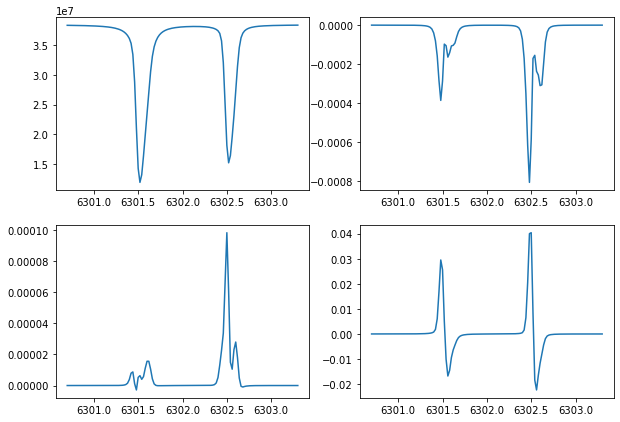

In [9]:
stokes = stokes0 * conversion
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,stokes[x_coordinate,y_coordinate,0])
plt.subplot(222)
plt.plot(ll,stokes[x_coordinate,y_coordinate,1]/stokes[x_coordinate,y_coordinate,0])
plt.subplot(223)
plt.plot(ll,stokes[x_coordinate,y_coordinate,2]/stokes[x_coordinate,y_coordinate,0])
plt.subplot(224)
plt.plot(ll,stokes[x_coordinate,y_coordinate,3]/stokes[x_coordinate,y_coordinate,0])

In [42]:
def modulation_row(Delta,alpha,cQ,cU,cV):
    row = np.zeros(4)
    row[0] = 1.0
    row[1] = cQ*(1.+np.cos(Delta)+np.cos(4.*alpha)*(1.-np.cos(Delta)))*0.5
    row[2] = cU*(np.sin(4.*alpha)*(1.-np.cos(Delta)))*0.5
    row[3] = cV*(-1.*np.sin(2.*alpha)*np.sin(Delta))
    row = row.reshape(1,4)
    return row 

In [50]:
# Let's make the modulation matrix of te linear polarizer and a rotating wave-plate 
# This matrix use for Delta 127°, and for alpha (=omega*t) 90° divided in 8, both in radians
O8 = modulation_row(127*pi/180,pi/16,1,1,-1)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/8,-1,1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,3*pi/16,-1,-1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/4,1,-1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,5*pi/16,1,1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,3*pi/8,-1,1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,7*pi/16,-1,-1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/2,1,-1,1)],axis=0)
print(O8)                               

[[ 1.00000000e+00  7.65419621e-01  5.66327133e-01  3.05624578e-01]
 [ 1.00000000e+00 -1.99092488e-01  8.00907512e-01  5.64720585e-01]
 [ 1.00000000e+00  3.67234644e-01 -5.66327133e-01  7.37843002e-01]
 [ 1.00000000e+00 -6.01815023e-01 -9.80828820e-17  7.98635510e-01]
 [ 1.00000000e+00 -3.67234644e-01 -5.66327133e-01 -7.37843002e-01]
 [ 1.00000000e+00 -1.99092488e-01 -8.00907512e-01 -5.64720585e-01]
 [ 1.00000000e+00 -7.65419621e-01  5.66327133e-01 -3.05624578e-01]
 [ 1.00000000e+00  1.00000000e+00  1.96165764e-16 -9.78046421e-17]]


In [47]:
O8_inv = np.linalg.solve(np.dot(np.transpose(O8),O8), np.transpose(O8))
print(O8_inv)

[[ 0.11892867  0.13327379  0.0212032   0.07665213  0.21914394  0.18069175
   0.13327379  0.11683275]
 [ 0.28154593 -0.14995042  0.16894665 -0.28420995 -0.18090111 -0.09236473
  -0.14995042  0.40688406]
 [ 0.21071276  0.29704811 -0.48328293 -0.16552946  0.01060612 -0.171258
   0.29704811  0.00465529]
 [-0.09604995 -0.03052818  0.50813292  0.35145329 -0.39137078 -0.21153724
  -0.03052818 -0.09957187]]


In [54]:
# Let's make the modulation matrix of te linear polarizer and a rotating wave-plate 
# This matrix use for Delta 127°, and for alpha (=omega*t) 90° divided in 8, both in radians
O8 = modulation_row(127*pi/180,-3*pi/8,1,1,-1)
O8 = np.concatenate([O8,modulation_row(127*pi/180,-pi/4,-1,1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,-pi/8,-1,-1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,0,1,-1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/8,1,1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/4,-1,1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,3*pi/8,-1,-1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/2,1,-1,1)],axis=0)
print(O8)          

[[ 1.00000000e+00  1.99092488e-01  8.00907512e-01 -5.64720585e-01]
 [ 1.00000000e+00  6.01815023e-01 -9.80828820e-17 -7.98635510e-01]
 [ 1.00000000e+00 -1.99092488e-01  8.00907512e-01 -5.64720585e-01]
 [ 1.00000000e+00  1.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.99092488e-01  8.00907512e-01 -5.64720585e-01]
 [ 1.00000000e+00  6.01815023e-01  9.80828820e-17 -7.98635510e-01]
 [ 1.00000000e+00 -1.99092488e-01  8.00907512e-01 -5.64720585e-01]
 [ 1.00000000e+00  1.00000000e+00  1.96165764e-16 -9.78046421e-17]]
